In [3]:
from fastai.vision.all import *
import gradio as gr
def is_cat(x): return x[0].isupper()

In [7]:
from duckduckgo_search import ddg_images
from fastdownload import download_url

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')



In [13]:

urls = search_images('dog', max_images=1)
dest = 'dog.jpg'
download_url(urls[0], dest, show_progress=False)

urls = search_images('cat', max_images=1)
dest = 'cat.jpg'
download_url(urls[0], dest, show_progress=False)



Searching for 'dog'
Searching for 'cat'


Path('cat.jpg')

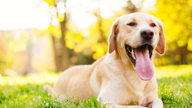

In [15]:
im = PILImage.create('dog.jpg')
im.thumbnail((192,192))
im

In [11]:
learn = load_learner('model.pkl')

In [18]:
%time learn.predict(im)

CPU times: total: 250 ms
Wall time: 48.6 ms


('False', tensor(0), tensor([1.0000e+00, 2.6030e-07]))

In [21]:
categories = ('dog', 'cat')

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))


In [22]:
classify_image(im)

{'dog': 0.9999997615814209, 'cat': 2.603025848202378e-07}

In [ ]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
exemple = ["dog.jpg", "cat.jpg"]

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=exemple)
intf.launch(inline=False)

c:\Users\rafae\miniconda3\lib\site-packages\gradio\inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\rafae\miniconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
c:\Users\rafae\miniconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\rafae\miniconda3\lib\site-packages\gradio\deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
